In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from joblib import load
import shap


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x_test = pd.read_csv('./final.csv')
df = pd.read_csv('./data_test_frequency.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,459.037295,1.000000,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,398.464564,1.000000,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,340.802438,1.000000,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,412.324324,1.000000,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,168.041577,0.956522,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579


In [87]:
y_test = df.iloc[:,:1]

In [4]:
model = load('./model.pkl')

In [84]:
row = x_test.iloc[[10]] 
y_res = y_test.iloc[[10]]
print(y_res)

      0
10  0.0


In [85]:

# Explainer dùng model.predict hoặc model.decision_function
explainer = shap.Explainer(model.decision_function, x_test)

# Tính SHAP values cho toàn bộ X_meta
shap_values = explainer(row)

print(np.shape(shap_values))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


(1, 212, 4)


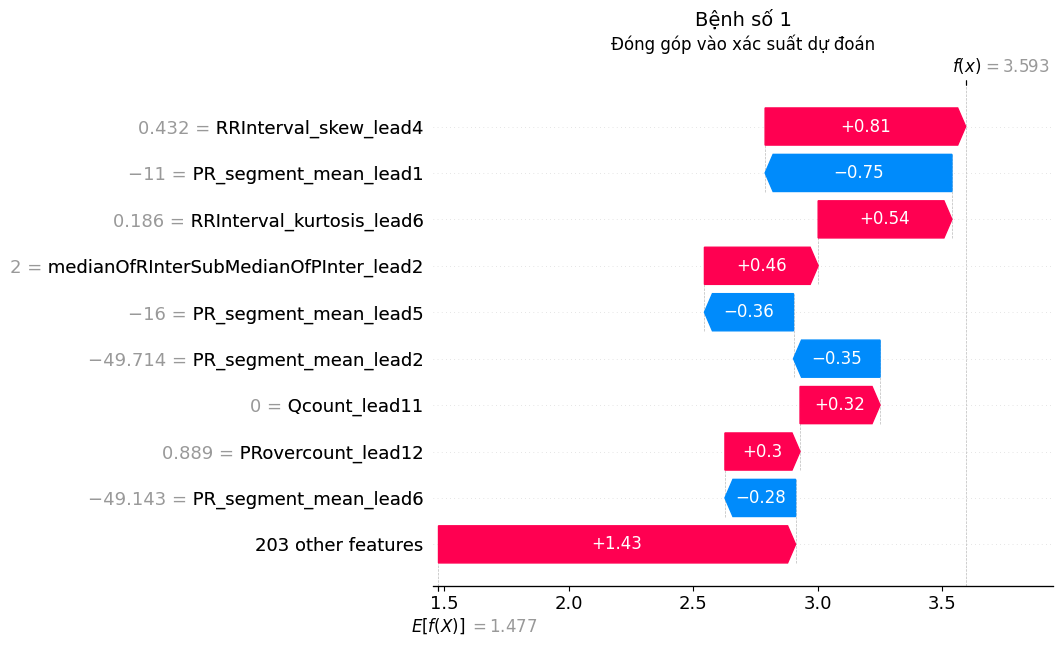

In [97]:
shap.plots.waterfall(shap_values[0,:,0], max_display=10, show=False)

plt.xlabel("Đóng góp vào xác suất dự đoán", fontsize=12)
plt.ylabel("Tên đặc trưng (feature)", fontsize=12)
plt.title("Bệnh số 1", fontsize=14)
plt.show()
# có thể thêm dòng xác suất bằng công thức p = 1 / (1 + np.exp(-f)), ở đây f(x)= 3.593 => p =97.3%

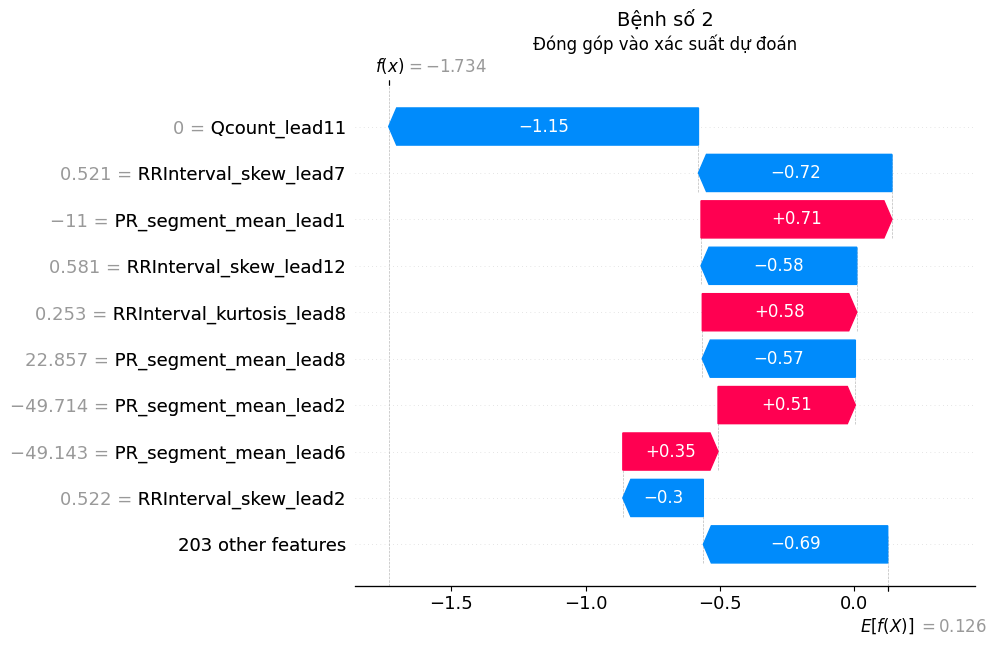

In [90]:
shap.plots.waterfall(shap_values[0,:,1], max_display=10, show=False)

plt.xlabel("Đóng góp vào xác suất dự đoán", fontsize=12)
plt.ylabel("Tên đặc trưng (feature)", fontsize=12)
plt.title("Bệnh số 2", fontsize=14)
plt.show()

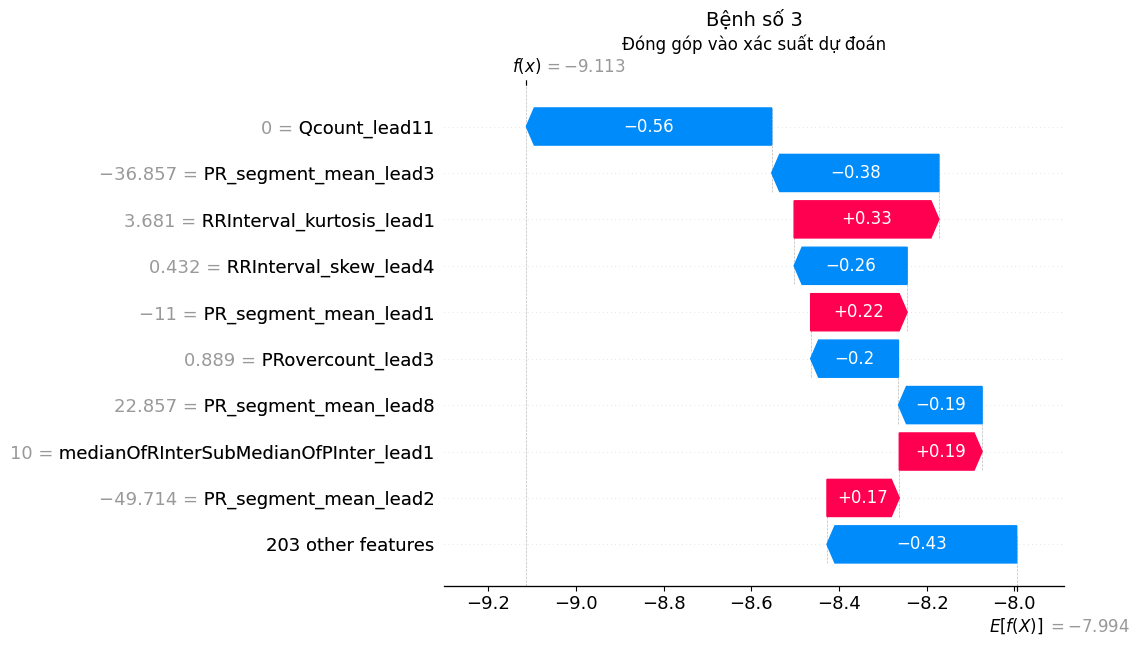

In [91]:
shap.plots.waterfall(shap_values[0,:,2], max_display=10, show=False)

plt.xlabel("Đóng góp vào xác suất dự đoán", fontsize=12)
plt.ylabel("Tên đặc trưng (feature)", fontsize=12)
plt.title("Bệnh số 3", fontsize=14)
plt.show()

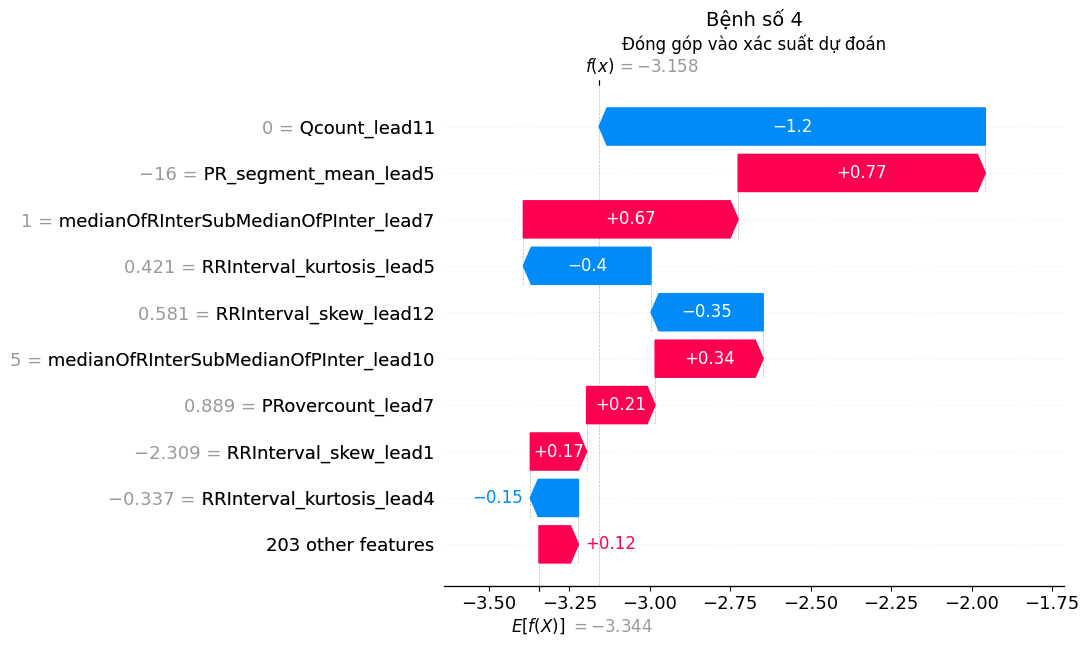

In [92]:
shap.plots.waterfall(shap_values[0,:,3], max_display=10, show=False)

plt.xlabel("Đóng góp vào xác suất dự đoán", fontsize=12)
plt.ylabel("Tên đặc trưng (feature)", fontsize=12)
plt.title("Bệnh số 4", fontsize=14)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23124\3479789450.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:, :, 0], features=shap_values,feature_names=x_test.columns,max_display=5)


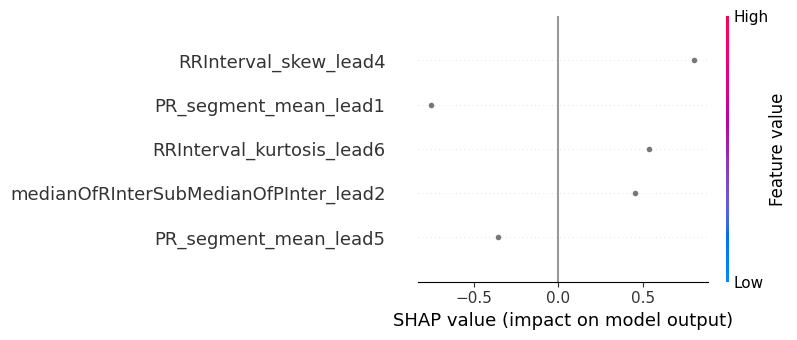

In [93]:
shap.summary_plot(shap_values.values[:, :, 0], features=shap_values,feature_names=x_test.columns,max_display=5)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


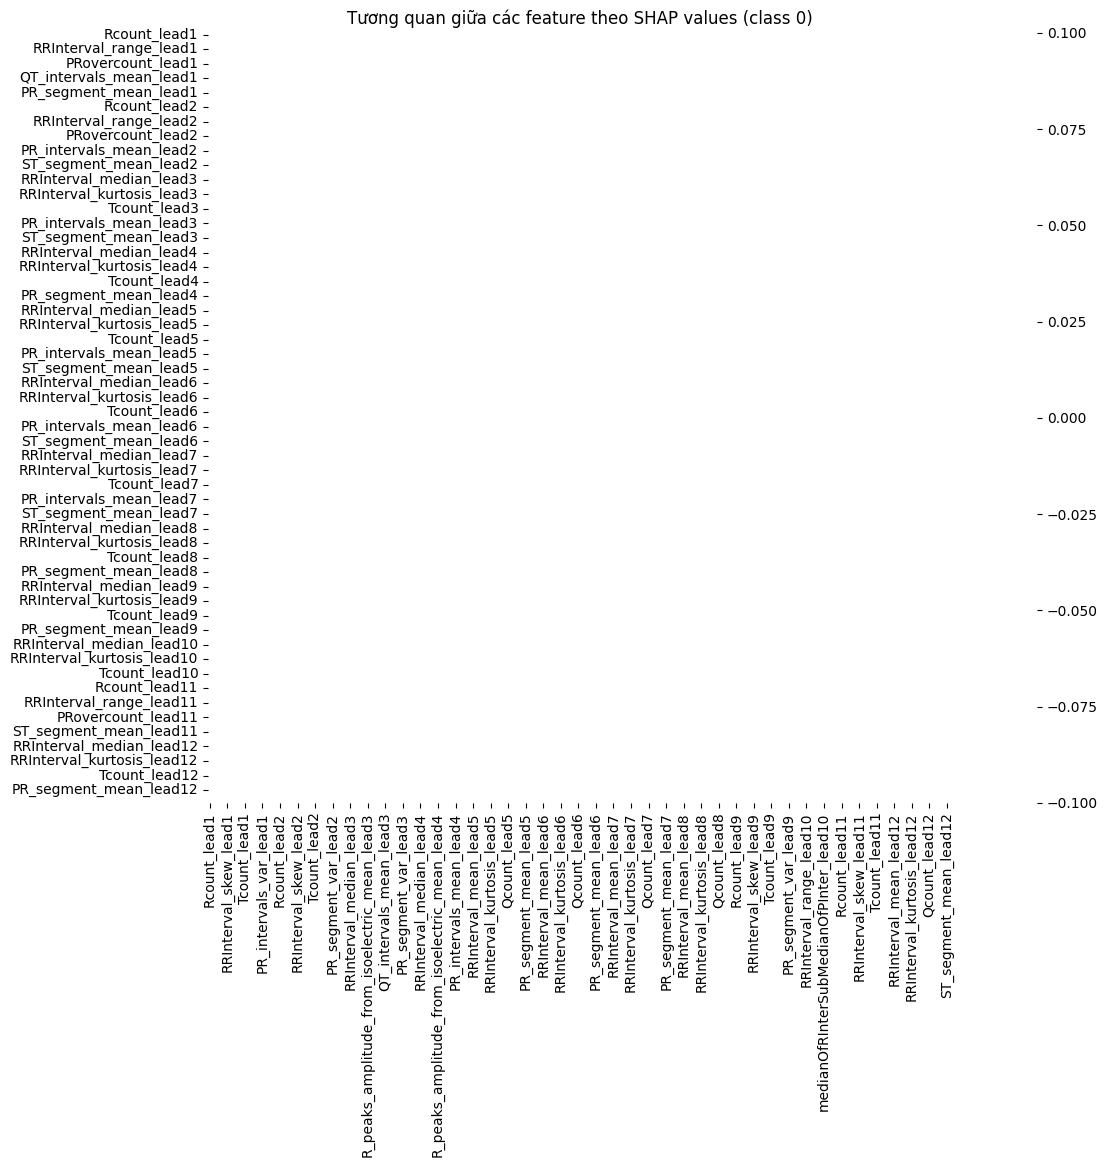

In [98]:
df_shap = pd.DataFrame(
    shap_values.values[:, :, 0],  # (100, 212)
    columns=x_test.columns
)
corr_matrix = df_shap.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Tương quan giữa các feature theo SHAP values (class 0)")
plt.show()
# có thể thêm biểu đồ này nhưng khôgn bắt buộc